In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("ticks")
sns.set_context(font_scale=1.2,context='paper')
sns.set_context({"figure.figsize": (12, 12)})

In [3]:
import pandas as pd
from random import seed
import random as rm
import numpy as np
import pyemma

from tqdm.notebook import tqdm  # progress bar

In [4]:
import deeptime
deeptime.__version__

'0.4.4'

In [5]:
class Dimer(object):
    def __init__(self, index):
        self.index = index
        self._trajectory_states = []
        self._state = self.states[0]
    
    def state_to_features(self):
        if self._state == "CC":
            return np.asarray([0.9, 0.1, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "OC":
            return np.asarray([0.1, 0.9, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "CO":
            return np.asarray([0.9, 0.1, 0.6, 0.1, 0.9, 0.6])
        elif self._state == "OO":
            return np.asarray([0.1, 0.9, 0.6, 0.1, 0.9, 0.6])
        elif self._state == "CD":
            return np.asarray([0.9, 0.1, 0.6, 0.1, 0.4, 0.6])
        elif self._state == "OD":
            return np.asarray([0.1, 0.9, 0.6, 0.1, 0.4, 0.6])
        elif self._state == "DC":
            return np.asarray([0.1, 0.4, 0.6, 0.9, 0.1, 0.6])
        elif self._state == "DO":
            return np.asarray([0.1, 0.4, 0.6, 0.1, 0.9, 0.6])
        elif self._state == "DD":
            return np.asarray([0.1, 0.4, 0.6, 0.1, 0.4, 0.6])
            
        
    def run(self, step):
        self._trajectory = np.zeros([step, 6])
        
        # Init state CC
        self._state = self.states[0]
        self._trajectory_states.append(self.state) 
        self._trajectory[0] = self.state_to_features()
        
        for i in range(1, step):
            if i % 5 == 0:
                self.propagate()
                
            self._trajectory_states.append(self.state) 
            self._trajectory[i] = self.state_to_features()

            
        noise = np.random.normal(0, .01, self._trajectory.shape)
        self._trajectory = self._trajectory + noise
        
    @property
    def state(self):
        return self._state
    
    @property
    def trajectory(self):
        return self._trajectory
    
    @property
    def trajectory_states(self):
        return self._trajectory_states
    
    def propagate(self):
        state_ind = self.states.index(self.state)
        transition = np.random.choice(self.transitionName[state_ind],
                                      replace=True,
                                      p=self.transitionMatrix[state_ind])
        self._state = transition.split('_')[1]
        
    # The statespace
    states = ["CC","OC","CO", "OO", "CD", "OD", "DC", "DO", "DD"]
    
    single_states = ["C", "O", "D"]


    # Possible sequences of events
    transitionName = [["CC_CC", "CC_OC", "CC_CO", "CC_OO", "CC_CD", "CC_OD", "CC_DC", "CC_DO", "CC_DD"],
                      ["OC_CC", "OC_OC", "OC_CO", "OC_OO", "OC_CD", "OC_OD", "OC_DC", "OC_DO", "OC_DD"],
                      ["CO_CC", "CO_OC", "CO_CO", "CO_OO", "CO_CD", "CO_OD", "CO_DC", "CO_DO", "CO_DD"],
                      ["OO_CC", "OO_OC", "OO_CO", "OO_OO", "OO_CD", "OO_OD", "OO_DC", "OO_DO", "OO_DD"],
                      ["CD_CC", "CD_OC", "CD_CO", "CD_OO", "CD_CD", "CD_OD", "CD_DC", "CD_DO", "CD_DD"],
                      ["OD_CC", "OD_OC", "OD_CO", "OD_OO", "OD_CD", "OD_OD", "OD_DC", "OD_DO", "OD_DD"],
                      ["DC_CC", "DC_OC", "DC_CO", "DC_OO", "DC_CD", "DC_OD", "DC_DC", "DC_DO", "DC_DD"],
                      ["DO_CC", "DO_OC", "DO_CO", "DO_OO", "DO_CD", "DO_OD", "DO_DC", "DO_DO", "DO_DD"],
                      ["DD_CC", "DD_OC", "DD_CO", "DD_OO", "DD_CD", "DD_OD", "DD_DC", "DD_DO", "DD_DD"],
                     ]

    # Probabilities matrix (transition matrix)
    transitionMatrix_asym = [[0.6, 0.1, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0],  #CC
                             [0.1, 0.2, 0.0, 0.5, 0.0, 0.1, 0.1, 0.0, 0.0],  #OC
                             [0.1, 0.0, 0.2, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1],  #CO
                             [0.0, 0.5, 0.1, 0.2, 0.0, 0.1, 0.0, 0.1, 0.0],  #OO
                             [0.1, 0.0, 0.0, 0.0, 0.4, 0.1, 0.0, 0.0, 0.4],  #CD
                             [0.0, 0.1, 0.0, 0.1, 0.1, 0.5, 0.0, 0.0, 0.2],  #OD
                             [0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.4],  #DC
                             [0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.5, 0.2],  #DO
                             [0.0, 0.0, 0.1, 0.0, 0.4, 0.2, 0.4, 0.1, 0.5] #DD
                        ]
    
#    transitionMatrix = (np.asarray(transitionMatrix_asym) + np.asarray(transitionMatrix_asym).T) / 2
    transitionMatrix =  [[0.6, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  #CC
                        [0.1, 0.3, 0.0, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0],  #OC
                        [0.1, 0.0, 0.3, 0.6, 0.0, 0.0, 0.0, 0.0, 0.0],  #CO
                        [0.0, 0.1, 0.1, 0.4, 0.0, 0.2, 0.0, 0.2, 0.0],  #OO
                        [0.2, 0.0, 0.1, 0.0, 0.2, 0.1, 0.0, 0.0, 0.4],  #CD
                        [0.0, 0.3, 0.0, 0.1, 0.2, 0.2, 0.0, 0.0, 0.2],  #OD
                        [0.2, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.1, 0.4],  #DC
                        [0.0, 0.0, 0.3, 0.1, 0.0, 0.0, 0.2, 0.2, 0.2],  #DO
                        [0.0, 0.0, 0.0, 0.0, 0.15, 0.1, 0.15, 0.1, 0.5] #DD
                       ]

In [6]:
station_dist = np.asarray([6/35, 2/35, 2/35, 4/35, 3/35, 4/35, 3/35, 4/35, 7/35])

In [ ]:
transitionName = [["CC_CC", "CC_OC", "CC_CO", "CC_OO", "CC_CD", "CC_OD", "CC_DC", "CC_DO", "CC_DD"],
                    ["OC_CC", "OC_OC", "OC_CO", "OC_OO", "OC_CD", "OC_OD", "OC_DC", "OC_DO", "OC_DD"],
                    ["CO_CC", "CO_OC", "CO_CO", "CO_OO", "CO_CD", "CO_OD", "CO_DC", "CO_DO", "CO_DD"],
                    ["OO_CC", "OO_OC", "OO_CO", "OO_OO", "OO_CD", "OO_OD", "OO_DC", "OO_DO", "OO_DD"],
                    ["CD_CC", "CD_OC", "CD_CO", "CD_OO", "CD_CD", "CD_OD", "CD_DC", "CD_DO", "CD_DD"],
                    ["OD_CC", "OD_OC", "OD_CO", "OD_OO", "OD_CD", "OD_OD", "OD_DC", "OD_DO", "OD_DD"],
                    ["DC_CC", "DC_OC", "DC_CO", "DC_OO", "DC_CD", "DC_OD", "DC_DC", "DC_DO", "DC_DD"],
                    ["DO_CC", "DO_OC", "DO_CO", "DO_OO", "DO_CD", "DO_OD", "DO_DC", "DO_DO", "DO_DD"],
                    ["DD_CC", "DD_OC", "DD_CO", "DD_OO", "DD_CD", "DD_OD", "DD_DC", "DD_DO", "DD_DD"],
                    ]

In [7]:
transitionMatrix = np.asarray(
                [[20/40, 4/40, 4/40, 0/40, 6/40, 0/40, 6/40, 0/40, 0/40],  #CC
                 [20/40, 4/40, 4/40, 0/40, 6/40, 0/40, 6/40, 0/40, 0/40],  #OC]]

In [10]:
alpha_mat = np.zeros_like(transitionMatrix)
import itertools
for i, j in itertools.product(range(9), range(9)):
    alpha_mat[i, j] = np.min([1, transitionMatrix[j, i] * station_dist[j] / station_dist[i] / transitionMatrix[i, j]])

/tmp/ipykernel_1715704/2489635582.py:4: RuntimeWarning: invalid value encountered in double_scalars
  alpha_mat[i, j] = np.min([1, transitionMatrix[j, i] * station_dist[j] / station_dist[i] / transitionMatrix[i, j]])
/tmp/ipykernel_1715704/2489635582.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  alpha_mat[i, j] = np.min([1, transitionMatrix[j, i] * station_dist[j] / station_dist[i] / transitionMatrix[i, j]])


Text(69.91666666666667, 0.5, 'From')

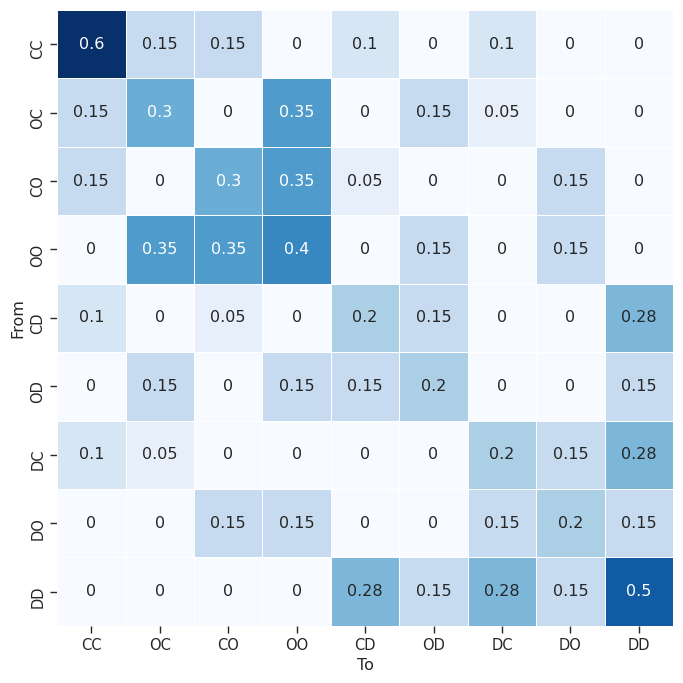

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(glic_dimer.transitionMatrix,
            ax=ax,
            xticklabels=glic_dimer.states,
            yticklabels=glic_dimer.states,
            annot=True,
            cmap="Blues",
            cbar=False,
            square=True,
            linewidths=0.5,
            )

ax.set_xlabel("To")
ax.set_ylabel("From")
#plt.savefig("assets/transition_matrix_dimer.pdf", dpi=300, transparent=True)

In [6]:
glic_dimer = Dimer(0)

In [7]:
glic_dimer.run(50000)

In [8]:
from deeptime.markov.msm import MarkovStateModel
msm_model = MarkovStateModel(glic_dimer.transitionMatrix, reversible=True)

In [103]:
#T = msm_model.transition_matrix
#mu = msm_model.stationary_distribution

T = msm_model.prior.transition_matrix[[6,4,5,0,3,1,7,8,2]][:,[6,4,5,0,3,1,7,8,2]]
mu = msm_model.prior.stationary_distribution[[6,4,5,1,3,0,7,8,2]]

In [104]:
prod = mu[:, None] * T

Text(69.91666666666667, 0.5, 'From')

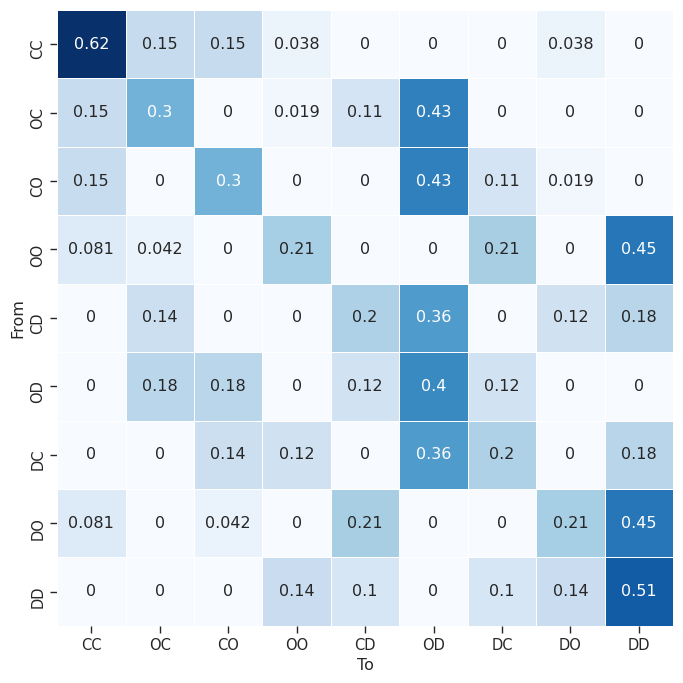

In [105]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(T,
            ax=ax,
            xticklabels=glic_dimer.states,
            yticklabels=glic_dimer.states,
            annot=True,
            cmap="Blues",
            cbar=False,
            square=True,
            linewidths=0.5,
            )

ax.set_xlabel("To")
ax.set_ylabel("From")
#plt.savefig("assets/transition_matrix_dimer.pdf", dpi=300, transparent=True)

In [9]:
from deeptime.base import Model
from typing import List

def pcca(P, m, stationary_distribution=None):
    if m <= 0 or m > P.shape[0]:
        raise ValueError("Number of metastable sets must be larger than 0 and can be at most as large as the number "
                         "of states.")
    from scipy.sparse import issparse
    if issparse(P):
        warnings.warn('PCCA is only implemented for dense matrices, '
                      'converting sparse transition matrix to dense ndarray.', stacklevel=2)
        P = P.toarray()

    # stationary distribution
    if stationary_distribution is None:
        from deeptime.markov.tools.analysis import stationary_distribution
        pi = stationary_distribution(P)
    else:
        pi = stationary_distribution

    # memberships
    from deeptime.markov.tools.analysis.dense._pcca import pcca as _algorithm_impl
    M = _algorithm_impl(P, m, pi)

    # coarse-grained stationary distribution
    pi_coarse = np.dot(M.T, pi)

    # HMM output matrix
    B = np.linalg.multi_dot([np.diag(1.0 / pi_coarse), M.T, np.diag(pi)])
    # renormalize B to make it row-stochastic
    B /= B.sum(axis=1)[:, None]

    # coarse-grained transition matrix
    W = np.linalg.inv(np.dot(M.T, M))
    A = np.dot(np.dot(M.T, P), M)
    P_coarse = np.dot(W, A)

    # symmetrize and renormalize to eliminate numerical errors
    X = np.dot(np.diag(pi_coarse), P_coarse)
    # and normalize
    P_coarse = X / X.sum(axis=1)[:, None]

    return PCCAModel(P_coarse, pi_coarse, M, B)


class PCCAModel(Model):
    """
    Model for PCCA+ spectral clustering method with optimized memberships.

    PCCA+ spectral clustering is described in :footcite:`roblitz2013fuzzy`.
    Clusters the first m eigenvectors of a transition matrix in order to cluster the states.
    This function does not assume that the transition matrix is fully connected. Disconnected sets
    will automatically define the first metastable states, with perfect membership assignments.

    Parameters
    ----------
    transition_matrix_coarse : ndarray (n,n)
        Coarse transition matrix.
    pi_coarse : ndarray (n,)
        Coarse stationary distribution
    memberships : ndarray (n,m)
        The pcca memberships to clusters
    metastable_distributions : ndarray (m, n)
        metastable distributions

    See Also
    --------
    pcca : Method that produces this type of model.
    msm.MarkovStateModel.pcca : Coarse-grain with PCCA+ from already existing MSM instance.

    References
    ----------
    .. footbibliography::
    """

    def __init__(self, transition_matrix_coarse: np.ndarray, pi_coarse: np.ndarray, memberships: np.ndarray,
                 metastable_distributions: np.ndarray):
        super().__init__()
        self._transition_matrix_coarse = transition_matrix_coarse
        self._pi_coarse = pi_coarse
        self._memberships = memberships
        self._metastable_distributions = metastable_distributions
        self._m = self._memberships.shape[1]

    @property
    def n_metastable(self):
        r""" Number of metastable states. """
        return self._m

    @property
    def memberships(self):
        r""" Probabilities of MarkovStateModel states to belong to a metastable state by PCCA+

        Returns the memberships of active set states to metastable sets.

        Returns
        -------
        M : ndarray((n,m))
            A matrix containing the probability or membership of each state to be
            assigned to each metastable set, i.e. p(metastable | state).
            The row sums of M are 1.
        """
        return self._memberships

    @property
    def metastable_distributions(self):
        r""" Probability of metastable states to visit an MarkovStateModel state by PCCA+

        Returns the probability distributions of active set states within
        each metastable set by combining the PCCA+ method with
        Bayesian inversion as described in :footcite:`noe2013projected`.

        Returns
        -------
        p_out : ndarray (m,n)
            A matrix containing the probability distribution of each active set
            state, given that we are in one of the m metastable sets,
            i.e. p(state | metastable). The row sums of p_out are 1.
        """
        return self._metastable_distributions

    @property
    def coarse_grained_transition_matrix(self):
        r""" Coarse grained transition matrix with :attr:`n_metastable` states. """
        return self._transition_matrix_coarse

    @property
    def coarse_grained_stationary_probability(self):
        r""" Stationary distribution for :attr:`coarse_grained_transition_matrix`. """
        return self._pi_coarse

    @property
    def assignments(self) -> np.ndarray:
        """ Assignment of states to metastable sets using PCCA++

        Computes the assignment to metastable sets for active set states using
        the PCCA++ method :footcite:`roblitz2013fuzzy`.

        This is only recommended for visualization purposes. You *cannot* compute
        any actual quantity of the coarse-grained kinetics without employing the
        fuzzy memberships!

        Returns
        -------
        assignments : ndarray (n,)
            For each MarkovStateModel state, the metastable state it is located in.

        """
        return np.argmax(self.memberships, axis=1)

    @property
    def sets(self) -> List[np.ndarray]:
        """ Metastable sets using PCCA+

        Computes the metastable sets of active set states within each
        metastable set using the PCCA+ method :footcite:`roblitz2013fuzzy`.

        This is only recommended for visualization purposes. You *cannot*
        compute any actual quantity of the coarse-grained kinetics without
        employing the fuzzy memberships!

        Returns
        -------
        sets : list of ndarray
            A list of length equal to metastable states. Each element is an
            array with microstate indexes contained in it
        """
        res = []
        assignment = self.assignments
        for i in range(self.n_metastable):
            res.append(np.where(assignment == i)[0])
        return res

In [10]:
from deeptime.markov.tools.analysis import is_reversible

Text(69.91666666666667, 0.5, 'From')

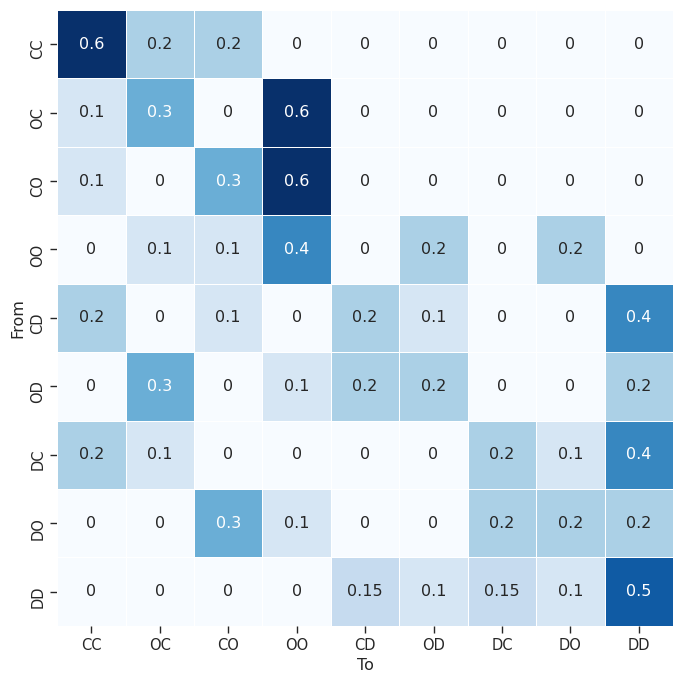

In [12]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(glic_dimer.transitionMatrix,
            ax=ax,
            xticklabels=glic_dimer.states,
            yticklabels=glic_dimer.states,
            annot=True,
            cmap="Blues",
            cbar=False,
            square=True,
            linewidths=0.5,
            )

ax.set_xlabel("To")
ax.set_ylabel("From")
#plt.savefig("assets/transition_matrix_dimer.pdf", dpi=300, transparent=True)

In [13]:
from typing import Optional, List
from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset

class MultimerTrajectoriesDataset(TrajectoriesDataset):
    def __init__(self, multimer: int, data: List[TrajectoryDataset]):
        self.multimer = multimer
        super().__init__(data)

    @staticmethod
    def from_numpy(lagtime, multimer, data: List[np.ndarray]):
        assert isinstance(data, list)
        assert len(data) > 0 and all(data[0].shape[1:] == x.shape[1:] for x in data), "Shape mismatch!"

        data_new = []
        total_shape = data[0].shape[1]
        per_shape = int(total_shape / multimer)

        for i in range(multimer):
            data_new.extend(
                [np.roll(traj.reshape(traj.shape[0], multimer, per_shape),
                                                i, axis=1).reshape(traj.shape[0],total_shape)
                for traj in data])
        return MultimerTrajectoriesDataset(multimer, [TrajectoryDataset(lagtime, traj) for traj in data_new])

In [14]:
from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset

data = [glic_dimer.trajectory.astype(np.float32)]
dataset = MultimerTrajectoriesDataset.from_numpy(5, 2, data)

In [15]:
from deeptime.decomposition import TICA

tica = TICA(var_cutoff=None, lagtime=5)

tica.fit(dataset)

tica_output= [tica.transform(traj) for traj in dataset.trajectories]
tica_concatenated= np.concatenate(tica_output)

tica_model_tica = tica.fetch_model()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


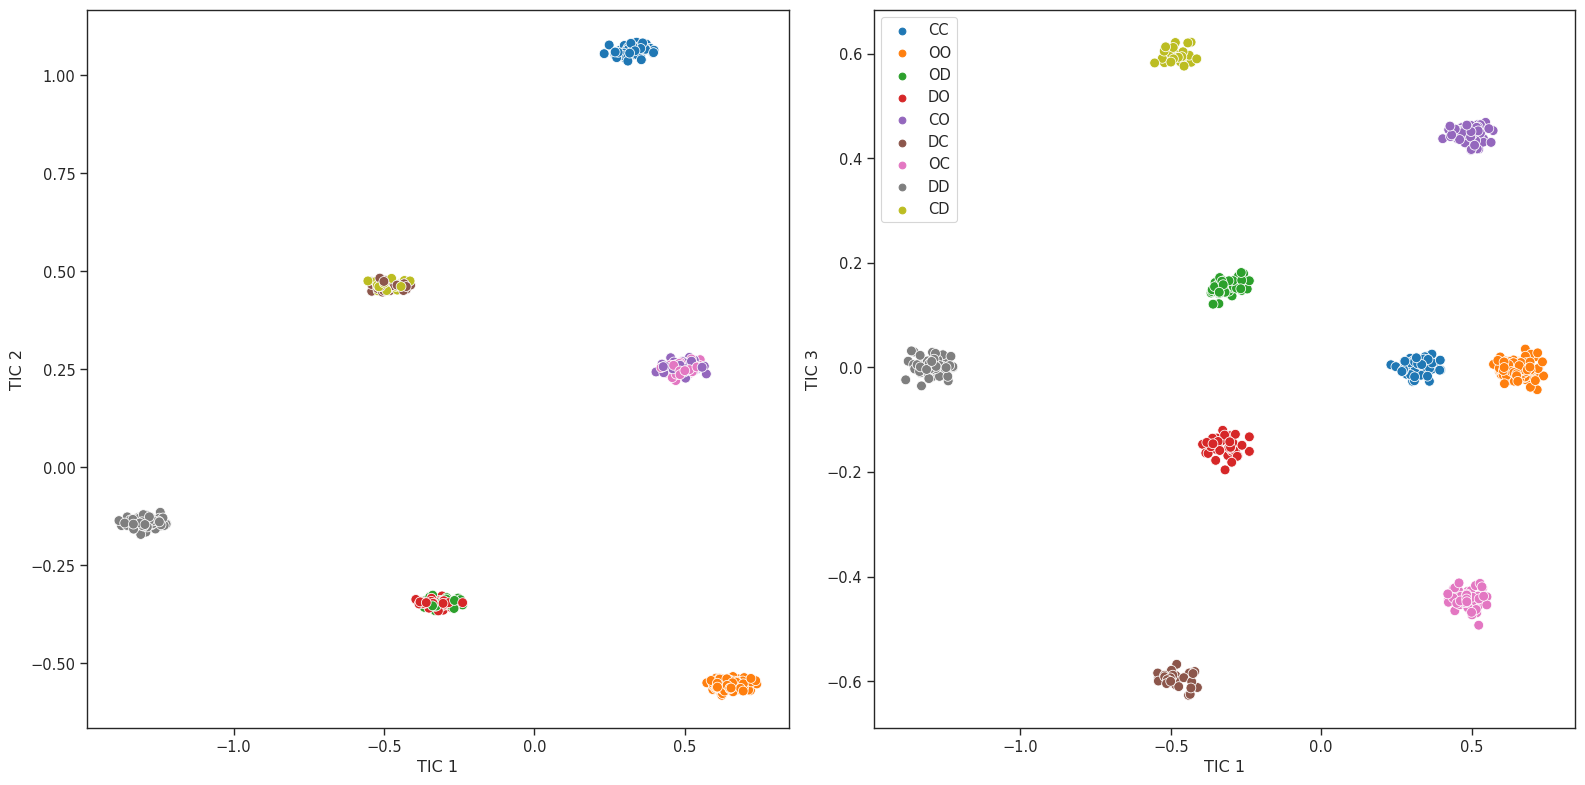

In [16]:
feature = dataset.trajectories[0]
feature_transformed = tica.transform(feature)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
sns.scatterplot(
            x=feature_transformed[::100, 0],
            y=feature_transformed[::100, 1],
            hue=glic_dimer.trajectory_states[::100],
            s=50, alpha=1, ax=axes[0], legend=False)

axes[0].set_xlabel("TIC 1")
axes[0].set_ylabel("TIC 2")
sns.scatterplot(
            x=feature_transformed[::100, 0],
            y=feature_transformed[::100, 3],
            hue=glic_dimer.trajectory_states[::100],
            s=50, alpha=1, ax=axes[1])

axes[1].set_xlabel("TIC 1")
axes[1].set_ylabel("TIC 3")

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
#plt.savefig("assets/tica_dimer.pdf", dpi=300, transparent=True)

In [17]:
from deeptime.clustering import KMeans, RegularSpace

kmean = KMeans(
                n_clusters=9,
                init_strategy='kmeans++',
                max_iter=300,
                n_jobs=24,
                progress=tqdm)

In [18]:
cluster = kmean.fit(np.concatenate(tica_output)[::300, :3]).fetch_model()
dtrajs = [cluster.transform(traj[:, :3]) for traj in tica_output]
dtrajs_concatenated = np.concatenate(dtrajs)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [19]:
cluster_centers = cluster.cluster_centers

In [20]:
its = pyemma.msm.its(dtrajs, lags=10, nits=10, errors='bayes', n_jobs=1)
pyemma.plots.plot_implied_timescales(its, units='step', dt=1)

AttributeError: module 'ipywidgets' has no attribute 'version_info'

In [21]:
from sym_msm.msm.sym_transition import SymTransitionCountEstimator
lag = 5
from deeptime.markov.msm import BayesianMSM, MaximumLikelihoodMSM

counts = SymTransitionCountEstimator(lagtime=lag,
                                     multimer=2,
                                     count_mode='effective').fit_fetch(dtrajs)
msm = BayesianMSM(n_samples=100).fit(counts)

msm_model = msm.fetch_model()

from deeptime.markov.tools.analysis import stationary_distribution

pi_samples = []
traj_weights_samples = []
for sample in msm_model.samples:
    pi_samples.append(stationary_distribution(sample.transition_matrix))
    traj_weights_samples.append(sample.compute_trajectory_weights(dtrajs))

pi_samples = np.array(pi_samples, dtype=object)
traj_weights_samples = np.array(traj_weights_samples, dtype=object)

stationary_distribution = np.mean(pi_samples, axis=0)
pi = stationary_distribution
trajectory_weights = np.mean(traj_weights_samples, axis=0)

In [22]:
n_states = 9

lagtimes = np.arange(1, 7+1) * lag

print('Estimating lagtimes', lagtimes)

models = []
for lagtime in tqdm(lagtimes, desc='lagtime', total=len(lagtimes)):
    counts = SymTransitionCountEstimator(lagtime=lagtime,
                                         multimer=2,
                                         count_mode='effective').fit_fetch(dtrajs)
    models.append(BayesianMSM(n_samples=100).fit_fetch(counts))

ck_test = models[0].ck_test(models, n_states, progress=tqdm)

Estimating lagtimes [ 5 10 15 20 25 30 35]


lagtime:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

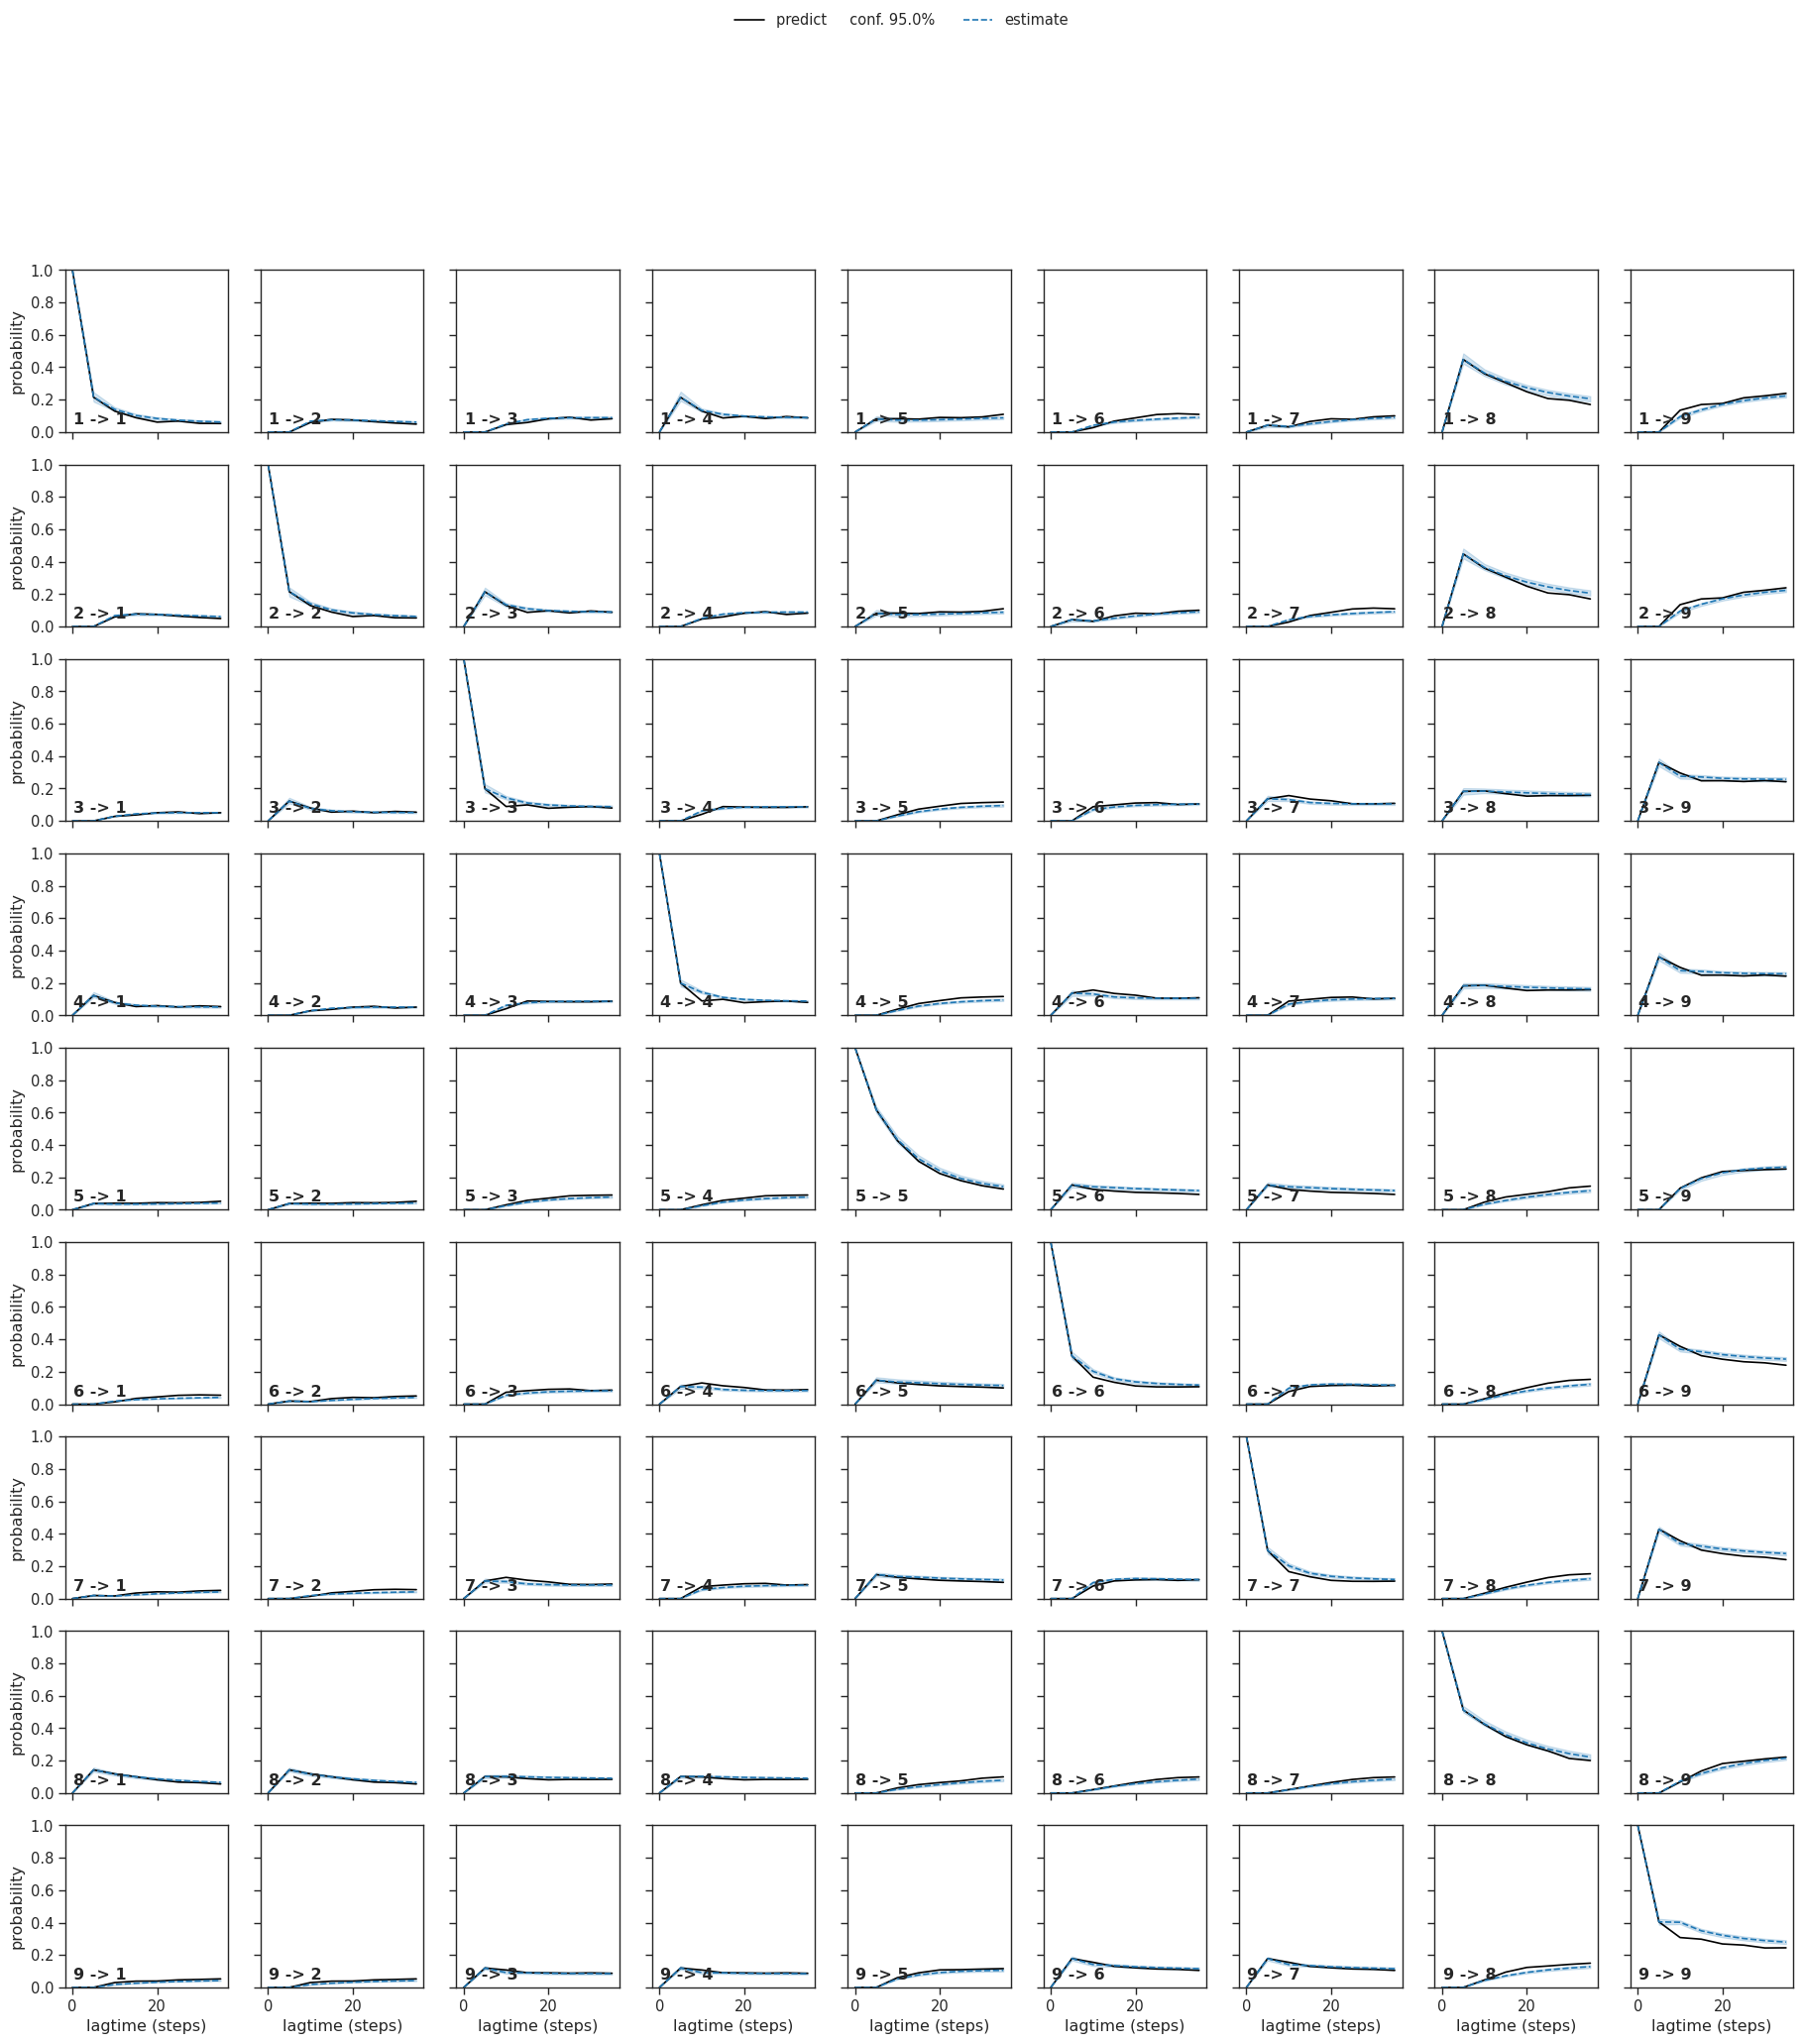

In [38]:
from deeptime.plots import plot_implied_timescales, plot_ck_test

plot_ck_test(ck_test)

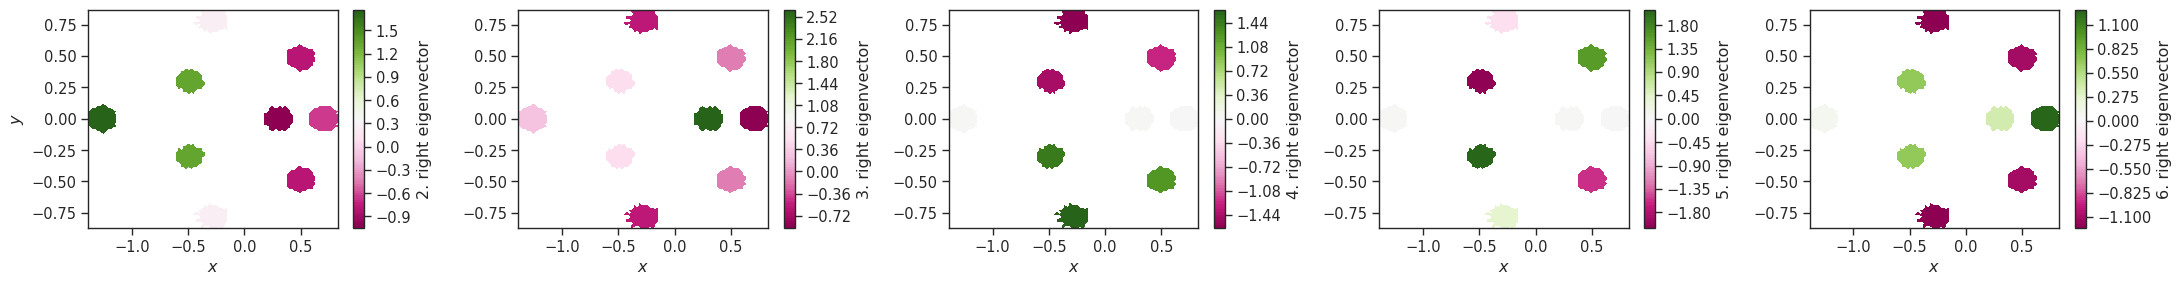

In [39]:
eigvec = msm_model.prior.eigenvectors_right()
fig, axes = plt.subplots(1, 5, figsize=(22, 3))
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated.T[[0,2]], eigvec[dtrajs_concatenated, i + 1], ax=ax, cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2), mask=True)
    ax.set_xlabel('$x$')
axes[0].set_ylabel('$y$')
fig.tight_layout()

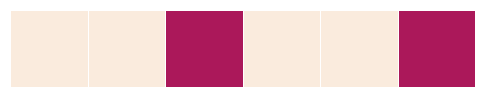

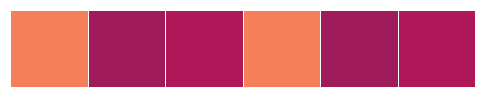

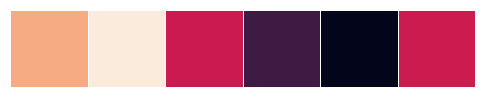

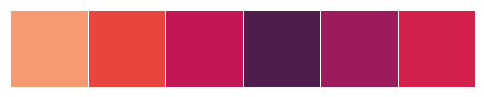

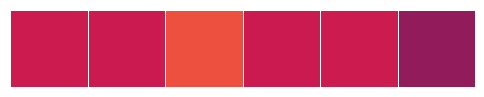

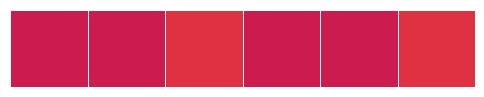

In [30]:
for i in range(6):
    fig, ax = plt.subplots(figsize=(6,1))
    sns.heatmap(tica_model_tica.instantaneous_coefficients.T[i].reshape(1, -1),
                ax=ax,
                linewidths=0.5,
                cbar=False,
                xticklabels='',
                yticklabels='',
                vmax=1.5,
                vmin=-1.5)
#    plt.savefig(f"assets/dimer_tica_{i}.pdf", dpi=300, transparent=True)

In [32]:
from sym_msm.decomposition.sym_tica import SymTICA

symtica = SymTICA(symmetry_fold=2, var_cutoff=0.8, lagtime=5, scaling=None)

symtica.fit(dataset)

symtica_output= symtica.transform(dataset.trajectories[0])
symtica_concatenated= np.concatenate(symtica_output)

symmetry_fold 2


In [33]:
symtica_model_tica = symtica.fetch_model()

NameError: name 'set_axis_boarder' is not defined

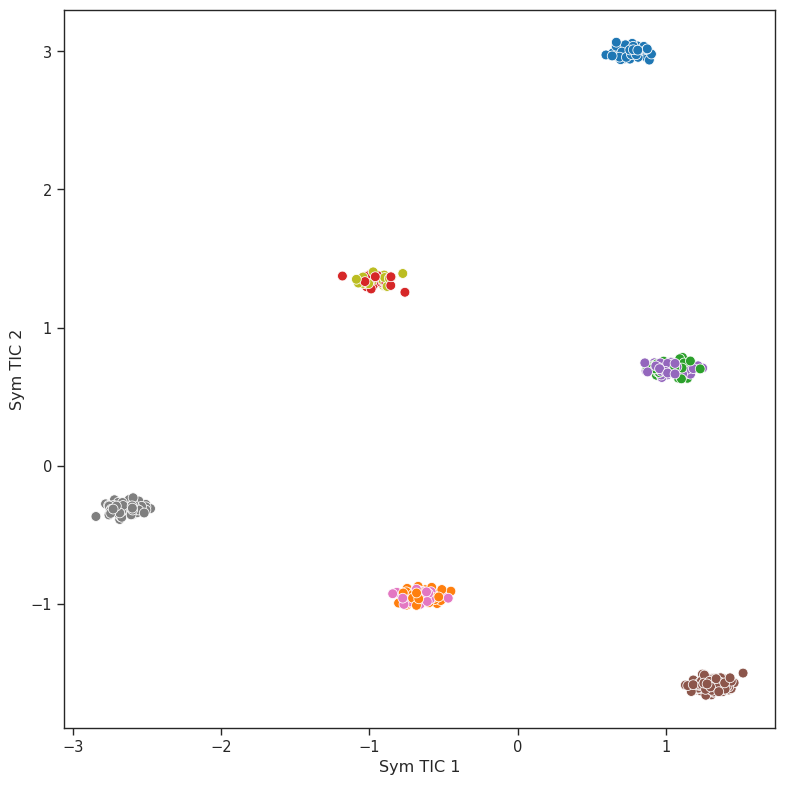

In [34]:
feature = dataset.trajectories[0]
feature_transformed = np.real(symtica.transform(feature))
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.scatterplot(
            x=feature_transformed[::100, 0],
            y=feature_transformed[::100, 1],
            hue=glic_dimer.trajectory_states[::100],
            s=50, alpha=1, ax=ax, legend=False)

ax.set_xlabel("Sym TIC 1")
ax.set_ylabel("Sym TIC 2")
#plt.legend(loc='upper right')
plt.tight_layout()
set_axis_boarder(ax)
plt.savefig("assets/dimer_sym_tica.pdf", dpi=300, transparent=True)

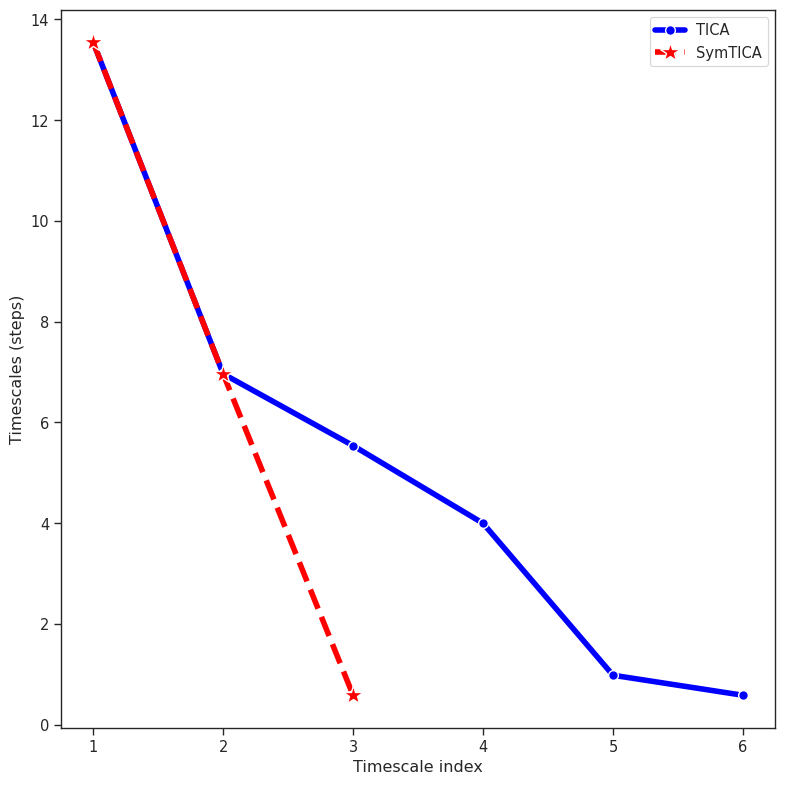

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
n_timescales=100

ax.plot(np.arange(1, tica_model_tica.timescales(k=n_timescales).shape[0]+1),
        tica_model_tica.timescales(k=n_timescales),
             marker='o',
             linestyle='-',
             linewidth=4,
             color='blue',
             markersize=7,
             markeredgecolor='white',
             label='TICA')
ax.plot(np.arange(1, symtica_model_tica.timescales(k=n_timescales).shape[0]+1),
             symtica_model_tica.timescales(k=n_timescales),
             marker='*',
             linestyle='--',
             linewidth=4,
             color='red',
             markersize=15,
             markeredgecolor='white',
            label='SymTICA')


ax.set_ylabel('Timescales (steps)')
ax.set_xlabel('Timescale index')
plt.legend(loc='upper right')
plt.tight_layout()
#plt.savefig("assets/dimer_timescales.pdf", dpi=300, transparent=True)

In [36]:
from deeptime.clustering import KMeans, RegularSpace

kmean = KMeans(
                n_clusters=6,
                init_strategy='kmeans++',
                max_iter=300,
                n_jobs=24,
                progress=tqdm)

In [37]:
cluster = kmean.fit(symtica_output).fetch_model()

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

In [38]:
dtrajs = cluster.transform(symtica_output)

In [39]:
cluster_centers = cluster.cluster_centers

estimating BayesianMSM:   0%|          | 0/6 [00:00<?, ?it/s]

21-03-23 13:56:48 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[14] WARNING  Changed user setting nits to the number of available timescales nits=5


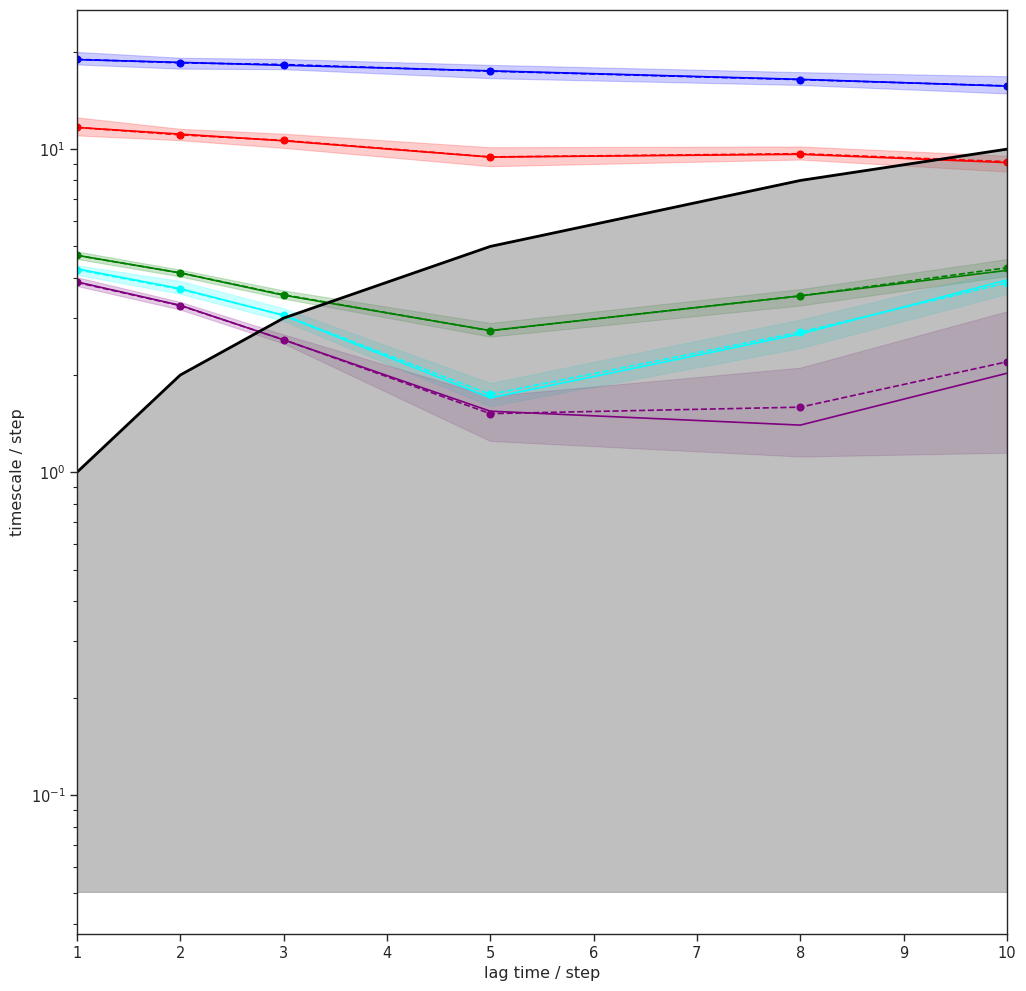

In [40]:
its = pyemma.msm.its(dtrajs, lags=10, nits=10, errors='bayes', n_jobs=1)
pyemma.plots.plot_implied_timescales(its, units='step', dt=1);

In [24]:
from deeptime.markov import TransitionCountEstimator
lag = 5
from deeptime.markov.msm import BayesianMSM, MaximumLikelihoodMSM

counts = TransitionCountEstimator(lagtime=lag,
                                  count_mode='effective').fit_fetch(dtrajs)
msm = BayesianMSM(n_samples=100).fit(counts)

msm_model = msm.fetch_model()

from deeptime.markov.tools.analysis import stationary_distribution

pi_samples = []
traj_weights_samples = []
for sample in msm_model.samples:
    pi_samples.append(stationary_distribution(sample.transition_matrix))
    traj_weights_samples.append(sample.compute_trajectory_weights(dtrajs))

pi_samples = np.array(pi_samples, dtype=object)
traj_weights_samples = np.array(traj_weights_samples, dtype=object)

stationary_distribution = np.mean(pi_samples, axis=0)
pi = stationary_distribution
trajectory_weights = np.mean(traj_weights_samples, axis=0)

In [37]:
n_states = 6

lagtimes = np.arange(1, 7+1) * lag

print('Estimating lagtimes', lagtimes)

models = []
for lagtime in tqdm(lagtimes, desc='lagtime', total=len(lagtimes)):
    counts = TransitionCountEstimator(lagtime=lagtime, count_mode='effective').fit_fetch(dtrajs)
    models.append(BayesianMSM(n_samples=100).fit_fetch(counts))

ck_test = models[0].ck_test(models, n_states, progress=tqdm)

Estimating lagtimes [ 5 10 15 20 25 30 35]


lagtime:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

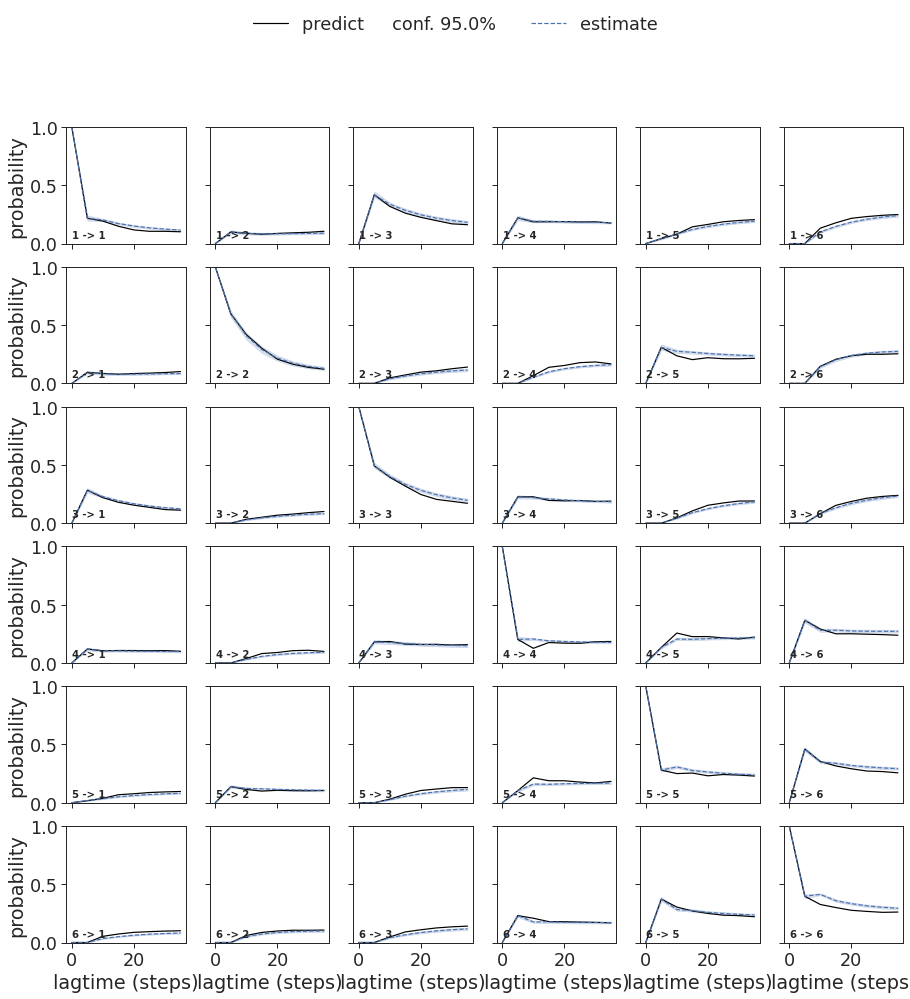

In [38]:
from deeptime.plots import plot_implied_timescales, plot_ck_test

plot_ck_test(ck_test)

<AxesSubplot: >

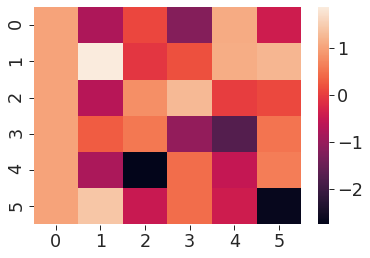

In [40]:
sns.heatmap(msm_model.prior.eigenvectors_right())

<AxesSubplot: >

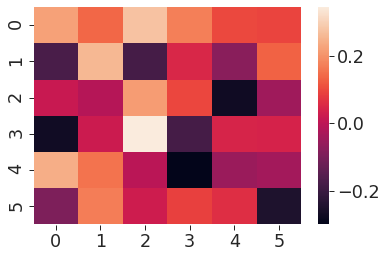

In [41]:
sns.heatmap(msm_model.prior.eigenvectors_left())

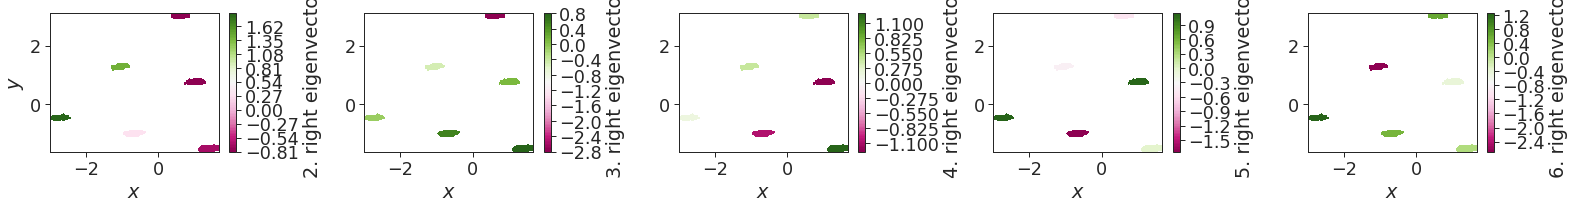

In [43]:
eigvec = msm_model.prior.eigenvectors_right()
fig, axes = plt.subplots(1, 5, figsize=(22, 3))
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *symtica_output.T[[0,1]], eigvec[dtrajs, i + 1], ax=ax, cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2), mask=True)
    ax.set_xlabel('$x$')
axes[0].set_ylabel('$y$')
fig.tight_layout()

In [27]:
trans_mat = msm_model.prior.transition_matrix

In [36]:
# get eigenvalues and eigenvectors of trans_mat

from scipy import linalg
from deeptime.markov.tools.analysis import eigenvalues
eval = eigenvalues(trans_mat)

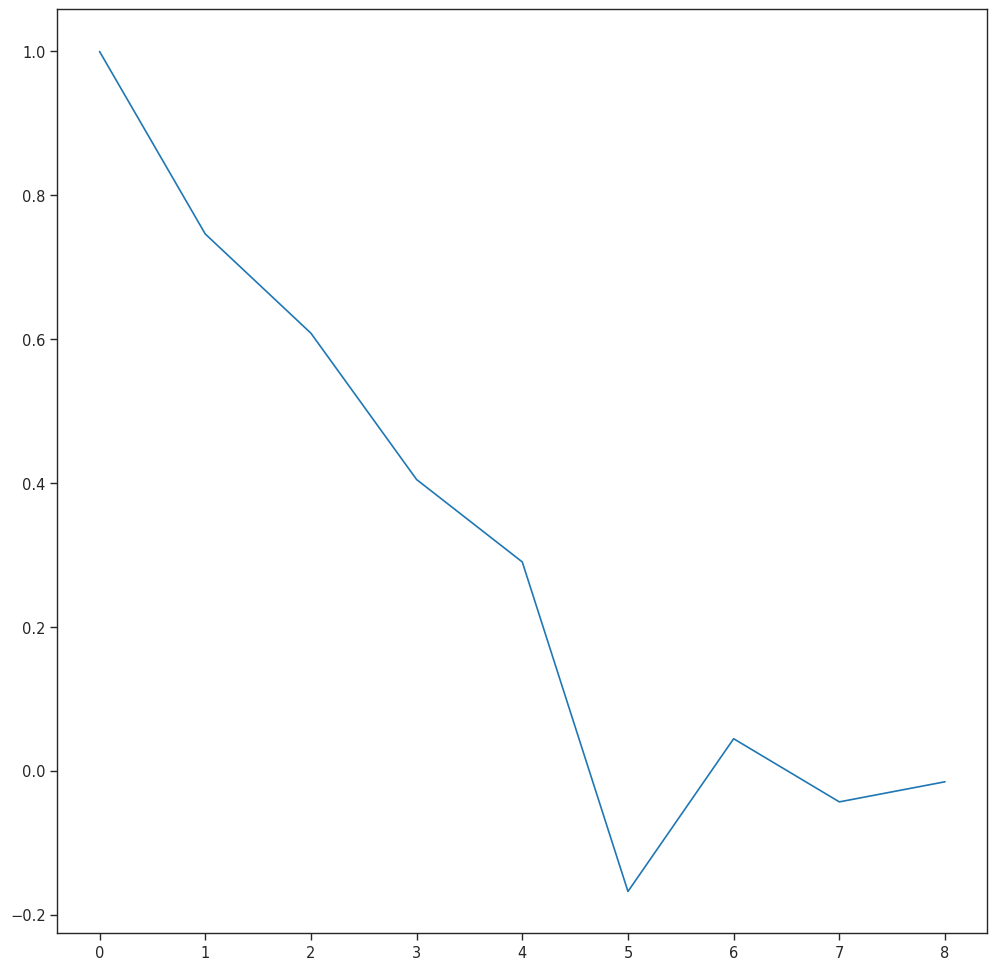

In [37]:
plt.plot(np.real(eval))

In [38]:
pcca = msm_model.prior.pcca(6)

In [39]:
metastable_traj = [pcca.assignments[c_traj] for c_traj in dtrajs]

In [40]:
print('label\tstate\tπ\t\tG/kT')
p_list = []
for i, s in enumerate(pcca.sets):
    p = stationary_distribution[s].sum()
    print('{}\t{}\t{:f}\t{:f}'.format('d', i + 1, p, -np.log(p)))
    p_list.append(p)

p_list = np.array(p_list)

label	state	π		G/kT
d	1	0.046978	3.058070
d	2	0.191870	1.650936
d	3	0.195855	1.630379
d	4	0.195038	1.634561
d	5	0.102245	2.280385
d	6	0.268013	1.316718


In [41]:
highest_membership = pcca.metastable_distributions.argmax(1)
coarse_state_centers = cluster_centers[highest_membership]

In [42]:
from itertools import product

mfpt = np.zeros((n_states, n_states))
mfpt_std = np.zeros((n_states, n_states))

for i, j in product(range(n_states), repeat=2):
    stats_mfpt = msm_model.gather_stats("mfpt",
                                        A=pcca.sets[i],
                                        B=pcca.sets[j])
    mfpt[i, j] = stats_mfpt.mean

    mfpt_std[i, j] = stats_mfpt.std

IndexError: list index out of range

In [45]:
inverse_mfpt = np.zeros_like(mfpt)
nz = mfpt.nonzero()
inverse_mfpt[nz] = 1.0 / mfpt[nz]

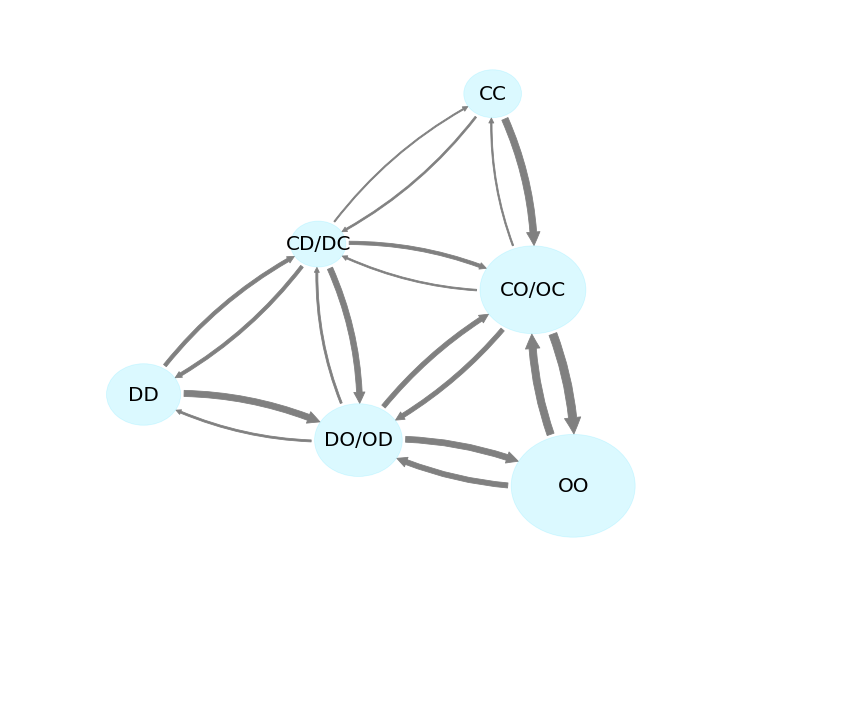

In [50]:
fig, ax = plt.subplots(figsize=(12, 10))
inverse_mfpt_direct = inverse_mfpt.copy()

inverse_mfpt_direct[0,5] = 0
inverse_mfpt_direct[5,0] = 0
inverse_mfpt_direct[1,2] = 0
inverse_mfpt_direct[2,1] = 0
inverse_mfpt_direct[1,3] = 0
inverse_mfpt_direct[3,1] = 0
inverse_mfpt_direct[1,5] = 0
inverse_mfpt_direct[5,1] = 0
inverse_mfpt_direct[2,4] = 0
inverse_mfpt_direct[4,2] = 0
inverse_mfpt_direct[2,5] = 0
inverse_mfpt_direct[5,2] = 0

pyemma.plots.plot_network(
    inverse_mfpt_direct,
    pos=coarse_state_centers,
    figpadding=0,
    arrow_label_format='%.0f',
    arrow_labels=None,
    arrow_scale=2,
    state_colors='#3cdfff2f',
    state_scale=2,
    state_sizes=p_list ** 1.5,
    size=20,
    show_frame=False,
    state_labels=['CD/DC', 'CC', 'DD', 'DO/OD', 'CO/OC', 'OO'],
    ax=ax)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
fig.tight_layout()
plt.savefig('assets/dimer_network.pdf', dpi=300, transparent=True)

In [51]:
transition_mean = msm_model.gather_stats('transition_matrix').mean

In [52]:
transition_std = msm_model.gather_stats('transition_matrix').std

In [53]:
transition_mean

array([[0.28039408, 0.        , 0.46013157, 0.10367767, 0.13792236,
        0.01787432],
       [0.        , 0.49176763, 0.        , 0.22472639, 0.        ,
        0.28350598],
       [0.37272725, 0.        , 0.39706782, 0.23020493, 0.        ,
        0.        ],
       [0.13328225, 0.17976918, 0.3652581 , 0.20188807, 0.        ,
        0.1198024 ],
       [0.30961008, 0.        , 0.        , 0.        , 0.59687991,
        0.09351001],
       [0.04250967, 0.41936844, 0.        , 0.22142269, 0.09896782,
        0.21773139]])

In [55]:
transition_std

array([[0.00641361, 0.        , 0.00765516, 0.00366987, 0.0053969 ,
        0.00161749],
       [0.        , 0.01072789, 0.        , 0.00772153, 0.        ,
        0.00838623],
       [0.00798465, 0.        , 0.008409  , 0.00608302, 0.        ,
        0.        ],
       [0.0052816 , 0.0067151 , 0.00726531, 0.00938086, 0.        ,
        0.00633007],
       [0.01028099, 0.        , 0.        , 0.        , 0.01237448,
        0.0063389 ],
       [0.00402712, 0.01241461, 0.        , 0.00883159, 0.00618512,
        0.01158389]])